In [253]:
# importing the required modules

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from tqdm import tqdm

### Signal without decay

In [1]:
# info about the data
f = 3.3 # initial frequency
freq_sampling =  114795 / 5.78562
noise_add = False
triggering = True
N_sample = 120000 # number of samples
Total_time = N_sample / freq_sampling # total time
amplitudes = [0.5, 0.7, 1.0, 1.2, 1.5] # amplitudes of the signal
phases = [0, np.pi/8, 2 * np.pi/8, 3 * np.pi/8, 4 * np.pi/8, 5 * np.pi/8, 6 * np.pi/8, 7 * np.pi/8] # phases of the signal
dc_signal = 0.0 # dc signal

# random amplitude
amplitude = amplitudes[np.random.randint(0, len(amplitudes))]
phase = phases[np.random.randint(0, len(phases))]

t = np.linspace(0, Total_time, N_sample, endpoint=False) # time array

# creating a sin wave with the frequency array
y = amplitude * np.sin(2 * np.pi * f * t + phase) + dc_signal

# adding some noise to the signal
if noise_add:
    y = y + 0.001 * np.random.normal(size=t.size)

# creeating a squarae wave with the frequency array and a phase shift of 90 degrees
y_square = 0.05*np.sin(2 * np.pi * f * t)

# converting the signal to a square wave
y_square = 0.025 * np.sign(y_square) + 0.025

# adding some noise to the signal
if noise_add:
    y_square = y_square + 0.0009 * np.random.normal(size=t.size)


NameError: name 'np' is not defined

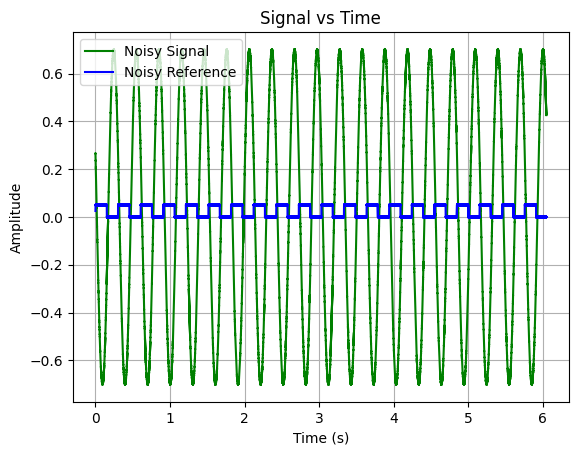

In [4]:
# plotting the current signal and the reference signal
plt.plot(t, y, 'g',label='Noisy Signal')
# plt.plot(t, y, 'r',label='Original Signal')
plt.plot(t, y_square, 'b',label='Noisy Reference')
# plt.plot(t, y_square, 'y',label='Original Reference')
plt.title('Signal vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [5]:
# finding the first rise index and further indices where reference signal gradiant changes
ref_data = np.array([t, y_square])
sig_data = np.array([t, y])

ref_sig_max = np.max(ref_data[1])
ref_sig_min = np.min(ref_data[1])

# centralizing the reference signal
ref_data[1] = ref_data[1] - ((ref_sig_max + ref_sig_min)/2)

first_rise_idx = 0
for i in range(1, N_sample):
    if ref_data[1][i] > 0 and ref_data[1][i-1] < 0:
        first_rise_idx = i
        break

ref_cross_idx = [first_rise_idx]
for i in range(first_rise_idx + 1, N_sample):
    if ref_data[1][i]*ref_data[1][i-1] < 0:
        ref_cross_idx.append(i)

triggered_sig = sig_data[1][first_rise_idx:]
triggered_ref = ref_data[1][first_rise_idx:]
triggered_time = sig_data[0][first_rise_idx:] - sig_data[0][first_rise_idx] # time starts from zero

ref_cross_idx = np.array(ref_cross_idx)
ref_cross_idx = ref_cross_idx - first_rise_idx # resetting the indices to start from zero

print(triggered_sig.shape)
print(triggered_ref.shape)
print(triggered_time.shape)
print(triggered_time)
print()
print(ref_cross_idx.shape)
print(ref_cross_idx)


(113987,)
(113987,)
(113987,)
[0.00000000e+00 5.03995819e-05 1.00799164e-04 ... 5.74474594e+00
 5.74479634e+00 5.74484674e+00]

(38,)
[     0   3006   6013   9019  12025  15031  18038  21044  24050  27057
  30063  33069  36075  39082  42088  45094  48101  51107  54113  57119
  60126  63132  66138  69144  72151  75157  78163  81170  84176  87182
  90188  93195  96201  99207 102214 105220 108226 111232]


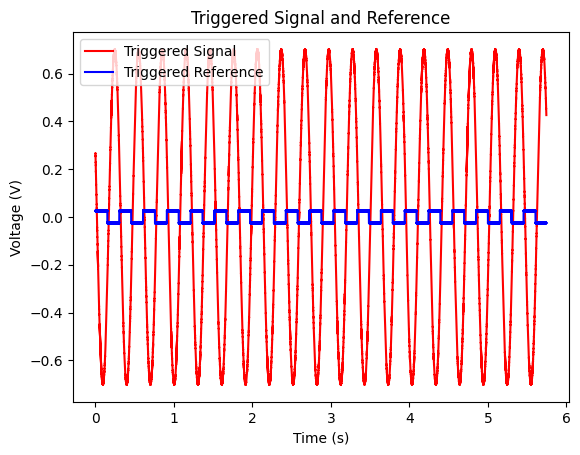

In [6]:
# plotting the triggered signals
plt.plot(triggered_time, triggered_sig, 'r', label='Triggered Signal')
plt.plot(triggered_time, triggered_ref, 'b', label='Triggered Reference')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Triggered Signal and Reference')
plt.legend()
plt.show()

#### Square wave to sine wave.

In [7]:
# finding the frequency of the triggered square wave using the fft
# yf = fft(triggered_ref)
# xf = fftfreq(len(triggered_ref), 1 / freq_sampling)
# freq = xf[np.argmax(np.abs(yf))]
# print('Frequency of the triggered square wave:', freq, 'Hz')

# fft on the original reference signal
yf = fft(y_square)[1:]
xf = fftfreq(N_sample, 1 / freq_sampling)[1:]
freq = xf[np.argmax(np.abs(yf))]
print('Frequency of the original square wave:', freq, 'Hz')


Frequency of the original square wave: 3.3069057421676504 Hz


sus!


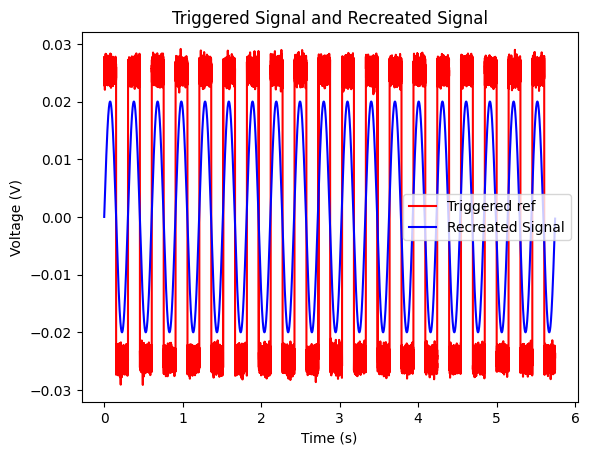

In [8]:
# recreating the sine wave with the same frequency as the triggered square wave
y = 0.02*np.sin(2 * np.pi * freq * triggered_time)

# plotting the triggered signal and the recreated sine wave
plt.plot(triggered_time, triggered_ref, 'r', label='Triggered ref')
plt.plot(triggered_time, y, 'b', label='Recreated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Triggered Signal and Recreated Signal')
plt.legend()
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

### Signal implementation

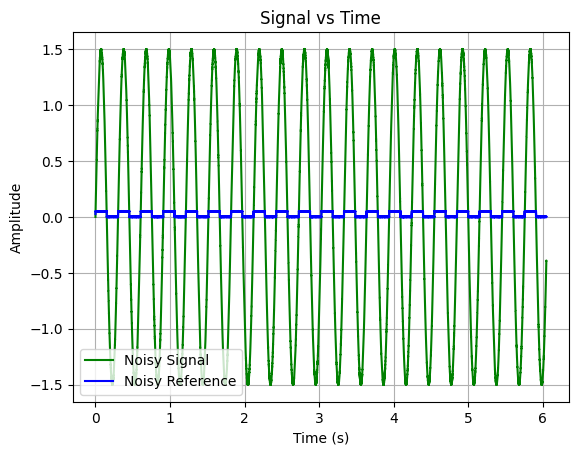

### lockin implementation

We have:
- freq: reference frequency
- triggered ref

In [2]:
# info about the data
f = 3.3 # initial frequency
freq_sampling =  114795 / 5.78562
noise_add = False
triggering = False
triggering_mode = 'falling' # rising or falling
N_sample = 120000 # number of samples
Total_time = N_sample / freq_sampling # total time
time_vary = False

amplitudes = [0.05, 0.07, 0.1, 0.12, 0.15] # amplitudes of the signal

phases = [0, np.pi/8, 2 * np.pi/8, 3 * np.pi/8, 4 * np.pi/8, 5 * np.pi/8, 6 * np.pi/8, 7 * np.pi/8] # phases of the signal
phases = [0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi,
          5 * np.pi/4, 6 * np.pi/4, 7 * np.pi/4, 2 * np.pi] # phases of the signal
# phases = [0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi,
#             5 * np.pi/4, 6 * np.pi/4, 7 * np.pi/4, 2 * np.pi,
#           -np.pi/4, -np.pi/2, -3 * np.pi/4, -np.pi,
#             -5 * np.pi/4, -6 * np.pi/4, -7 * np.pi/4, -2 * np.pi] # phases of the signal

dc_signal = 0.0 # dc signal

# random amplitude
amplitude = amplitudes[np.random.randint(0, len(amplitudes))]
phase = phases[np.random.randint(0, len(phases))]

# manually setting the amplitude and phase/
# amplitude = 0.001
# phase = np.pi/4

t = np.linspace(0, Total_time, N_sample, endpoint=False) # time array

# creating a sin wave with the frequency array
y = amplitude * np.sin(2 * np.pi * f * t + phase) + dc_signal

# adding some noise to the signal
if noise_add:
    y = y + 0.001 * np.random.normal(size=t.size)

# creeating a squarae wave with the frequency array and a phase shift of 90 degrees
y_square = 0.05*np.sin(2 * np.pi * f * t)

# converting the signal to a square wave
y_square = 0.025 * np.sign(y_square) + 0.025

# adding some noise to the signal
if noise_add:
    y_square = y_square + 0.0009 * np.random.normal(size=t.size)

if time_vary:
    t_cycle = 1/f
    N_cycle = N_sample * (t_cycle / Total_time)
    rand_idx = np.random.randint(0, int(N_cycle))

    N_sample = N_sample - (2 * rand_idx)

    t = t[rand_idx: N_sample + rand_idx]
    y = y[rand_idx: N_sample + rand_idx]
    y_square = y_square[rand_idx: N_sample + rand_idx]



if triggering:
    # centralizing the reference signal
    y_square_max = np.max(y_square)
    y_square_min = np.min(y_square)
    y_square = y_square - ((y_square_max + y_square_min)/2)

    if triggering_mode == 'rising':
        first_rise_idx = 0
        for i in range(1, N_sample):
            if y_square[i] > 0 and y_square[i-1] < 0:
                first_rise_idx = i
                break
    if triggering_mode == 'falling':
        first_rise_idx = 0
        for i in range(1, N_sample):
            if y_square[i] < 0 and y_square[i-1] > 0:
                first_rise_idx = i
                break

    # triggered signal, reference signal and time
    triggered_sig = y[first_rise_idx:]
    triggered_ref = y_square[first_rise_idx:]
    triggered_time = t[first_rise_idx:] - t[first_rise_idx] # time starts from zero
else:
    triggered_sig = y
    triggered_ref = y_square
    triggered_time = t


# fft on the original reference signal
yf = fft(y_square)[1:]
xf = fftfreq(N_sample, 1 / freq_sampling)[1:]
freq = xf[np.argmax(np.abs(yf))]
print('Frequency of the original square wave:', freq, 'Hz')

# creating sin and cos reference signals
ref_sin = 2 * np.sin(2 * np.pi * freq * triggered_time)
ref_cos = 2 * np.cos(2 * np.pi * freq * triggered_time)

# multiplying the triggered signal with the sin and cos reference signals
y_sin = triggered_sig * ref_sin
y_cos = triggered_sig * ref_cos

# taking the fft of the multiplied signals and finding the dc components
yf_sin = fft(y_sin)
yf_cos = fft(y_cos)

# finding the dc components
dc_sin = yf_sin[0].real / (len(ref_sin))
dc_cos = yf_cos[0].real / (len(ref_cos))

# finding voltage amplitude and phase
A = np.sqrt(dc_sin**2 + dc_cos**2)
phi = np.arctan(dc_cos/dc_sin)
if phi < 0:
    phi = phi + 2 * np.pi
# phi = np.degrees(phi)

print('Amplitude:', A)
print('Phase:', np.degrees(phi) + 7.5)
print('Frequency:', freq)

print('\nOriginal Amplitude:', amplitude)
print('Original Phase:', np.degrees(phase))
print('Original Frequency:', f)

# # # plotting the current signal and the reference signal
# plt.plot(t, y, 'g',label='Noisy Signal')
# # plt.plot(t, y, 'r',label='Original Signal')
# plt.plot(t, y_square, 'b',label='Noisy Reference')
# # plt.plot(t, y_square, 'y',label='Original Reference')
# plt.title('Signal vs Time')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid()
# plt.show()

# # plotting the triggered signals
# plt.plot(triggered_time, triggered_sig, 'r', label='Triggered Signal')
# plt.plot(triggered_time, triggered_ref, 'b', label='Triggered Reference')
# plt.xlabel('Time (s)')
# plt.ylabel('Voltage (V)')
# plt.title('Triggered Signal and Reference')
# plt.legend()
# plt.show()

# plot the observed signal and the recreated signal
plt.plot(triggered_time, triggered_sig, 'r', label='Triggered Signal')
plt.plot(triggered_time, A * np.sin(2 * np.pi * freq * triggered_time + phi), 'b', label='Recreated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Triggered Signal and Recreated Signal')
plt.legend()
plt.show()


NameError: name 'np' is not defined

Phases at which there is a $180\degree$ phase difference between answers:
- 135
- 180
- 225
- 270

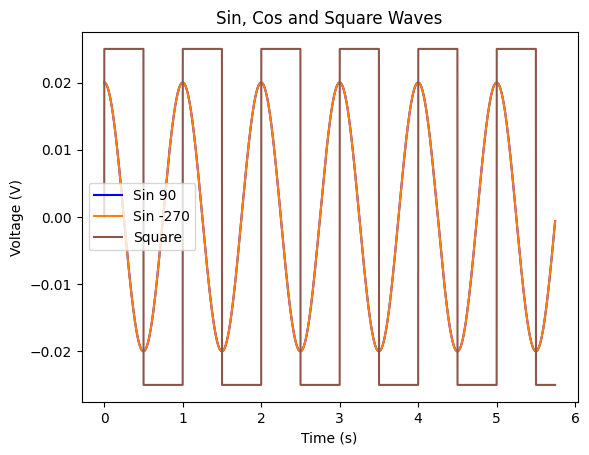

In [106]:
sq = 0.025 * np.sign(np.sin(2 * np.pi * 1 * triggered_time ))
sin = 0.02*np.sin(2 * np.pi * 1 * triggered_time)
sin_90 = 0.02*np.sin(2 * np.pi * 1 * triggered_time + np.pi/2)
sin_180 = 0.02*np.sin(2 * np.pi * 1 * triggered_time + np.pi)
sin_270 = 0.02*np.sin(2 * np.pi * 1 * triggered_time + 3*np.pi/2)
sin_360 = 0.02*np.sin(2 * np.pi * 1 * triggered_time + 2*np.pi)
sin_neg_90 = 0.02*np.sin(2 * np.pi * 1 * triggered_time - np.pi/2)
sin_neg_180 = 0.02*np.sin(2 * np.pi * 1 * triggered_time - np.pi)
sin_neg_270 = 0.02*np.sin(2 * np.pi * 1 * triggered_time - 3*np.pi/2)
sin_neg_360 = 0.02*np.sin(2 * np.pi * 1 * triggered_time - 2*np.pi)


# plt.plot(triggered_time, sin, 'r', label='Sin')
plt.plot(triggered_time, sin_90, 'b', label='Sin 90')
# plt.plot(triggered_time, sin_180, 'g', label='Sin 180')
# plt.plot(triggered_time, sin_270, 'y', label='Sin 270')
# plt.plot(triggered_time, sin_360, 'c', label='Sin 360')
# plt.plot(triggered_time, sin_neg_90, 'm', label='Sin -90')
# plt.plot(triggered_time, sin_neg_180, 'k', label='Sin -180')
plt.plot(triggered_time, sin_neg_270, 'tab:orange', label='Sin -270')
# plt.plot(triggered_time, sin_neg_360, 'tab:purple', label='Sin -360')
plt.plot(triggered_time, sq, 'tab:brown', label='Square')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Sin, Cos and Square Waves')
plt.legend()
plt.show()

Tolerance: 3.0000000000000004


100%|██████████| 3600/3600 [00:29<00:00, 123.04it/s]


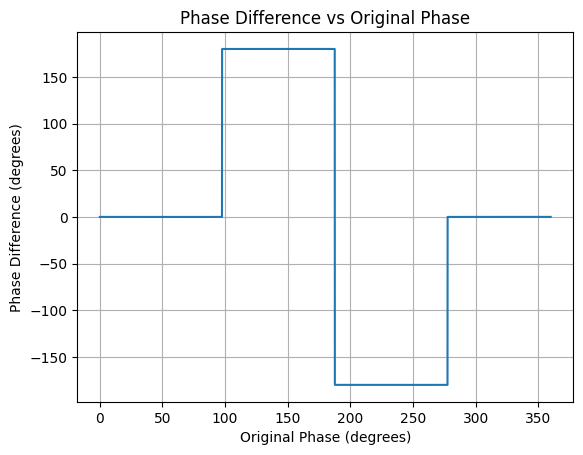

In [308]:
#Checking which phase gives the best results

# info about the data
f = 3.3 # initial frequency
freq_sampling =  114795 / 5.78562
noise_add = False
triggering = False
triggering_mode = 'falling' # rising or falling
N_sample = 120000 # number of samples
Total_time = N_sample / freq_sampling # total time
time_vary = False

# manually setting the amplitude and phase/
amplitude = 0.001
phases = np.linspace(0, 2*np.pi, 3601)[:-1]
tolerance = np.deg2rad(3)
print('Tolerance:', np.rad2deg(tolerance))
phis = []

for phase in tqdm(phases):
    t = np.linspace(0, Total_time, N_sample, endpoint=False) # time array

    # creating a sin wave with the frequency array
    y = amplitude * np.sin(2 * np.pi * f * t + phase) + dc_signal

    # adding some noise to the signal
    if noise_add:
        y = y + 0.001 * np.random.normal(size=t.size)

    # creeating a squarae wave with the frequency array and a phase shift of 90 degrees
    y_square = 0.05*np.sin(2 * np.pi * f * t)

    # converting the signal to a square wave
    y_square = 0.025 * np.sign(y_square) + 0.025

    # adding some noise to the signal
    if noise_add:
        y_square = y_square + 0.0009 * np.random.normal(size=t.size)

    if time_vary:
        t_cycle = 1/f
        N_cycle = N_sample * (t_cycle / Total_time)
        rand_idx = np.random.randint(0, int(N_cycle))

        N_sample = N_sample - (2 * rand_idx)

        t = t[rand_idx: N_sample + rand_idx]
        y = y[rand_idx: N_sample + rand_idx]
        y_square = y_square[rand_idx: N_sample + rand_idx]



    if triggering:
        # centralizing the reference signal
        y_square_max = np.max(y_square)
        y_square_min = np.min(y_square)
        y_square = y_square - ((y_square_max + y_square_min)/2)

        if triggering_mode == 'rising':
            first_rise_idx = 0
            for i in range(1, N_sample):
                if y_square[i] > 0 and y_square[i-1] < 0:
                    first_rise_idx = i
                    break
        if triggering_mode == 'falling':
            first_rise_idx = 0
            for i in range(1, N_sample):
                if y_square[i] < 0 and y_square[i-1] > 0:
                    first_rise_idx = i
                    break

        # triggered signal, reference signal and time
        triggered_sig = y[first_rise_idx:]
        triggered_ref = y_square[first_rise_idx:]
        triggered_time = t[first_rise_idx:] - t[first_rise_idx] # time starts from zero
    else:
        triggered_sig = y
        triggered_ref = y_square
        triggered_time = t


    # fft on the original reference signal
    yf = fft(y_square)[1:]
    xf = fftfreq(N_sample, 1 / freq_sampling)[1:]
    freq = xf[np.argmax(np.abs(yf))]
    # print('Frequency of the original square wave:', freq, 'Hz')

    # creating sin and cos reference signals
    ref_sin = 2 * np.sin(2 * np.pi * freq * triggered_time)
    ref_cos = 2 * np.cos(2 * np.pi * freq * triggered_time)

    # multiplying the triggered signal with the sin and cos reference signals
    y_sin = triggered_sig * ref_sin
    y_cos = triggered_sig * ref_cos

    # taking the fft of the multiplied signals and finding the dc components
    yf_sin = fft(y_sin)
    yf_cos = fft(y_cos)

    # finding the dc components
    dc_sin = yf_sin[0].real / (len(ref_sin))
    dc_cos = yf_cos[0].real / (len(ref_cos))

    # finding voltage amplitude and phase
    A = np.sqrt(dc_sin**2 + dc_cos**2)
    phi = np.arctan(dc_cos/dc_sin)
    if phi < 0:
        phi = phi + 2 * np.pi
    # phi = np.degrees(phi)
        
    phis.append(phi)

phis_2 = np.array(phis) + np.deg2rad(7.5)
phase_diff = (phis_2 - phases)

phases2 = np.degrees(phases)
phase_diff2 = np.degrees(phase_diff)

for i in range(len(phases2)):
    if phase_diff2[i] > 355:
        phase_diff2[i] = phase_diff2[i] - 360

plt.plot(phases2, phase_diff2)
plt.xlabel('Original Phase (degrees)')
plt.ylabel('Phase Difference (degrees)')
plt.title('Phase Difference vs Original Phase')
plt.grid()
plt.show()

In [309]:
# finding the range of phases that give 180 degrees phase difference
phase_180 = []
start = 0
end = 0
flag = 0
for i in range(len(phase_diff2)):
    if phase_diff2[i] > 90 and flag == 0:
        start = i
        flag = 1
    if phase_diff2[i] < 90 and flag == 1:
        end = i
        flag = 0
        phase_180.append([phases2[start], phases2[end]])
    
# finding the range of phases that give negative 180 degrees phase difference
phase_neg_180 = []
start = 0
end = 0
flag = 0
for i in range(len(phase_diff2)):
    if phase_diff2[i] < -90 and flag == 0:
        start = i
        flag = 1
    if phase_diff2[i] > -90 and flag == 1:
        end = i
        flag = 0
        phase_neg_180.append([phases2[start], phases2[end]])

print('Phases that give 180 degrees phase difference:')
print(phase_180)
print('Phases that give -180 degrees phase difference:')
print(phase_neg_180)



Phases that give 180 degrees phase difference:
[[97.60000000000001, 187.60000000000002]]
Phases that give -180 degrees phase difference:
[[187.60000000000002, 277.6]]


array([360., 360., 360., ..., 360., 360., 360.])